## Setup

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Introduction
The Keras functional API is a way to create models that are more flexible than the tf.keras.Sequential API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers. So the functional API is a way to build graphs of layers.

[(input: 784-dimensional vectors)]
       ↧

[Dense (64 units, relu activation)]
       ↧

[Dense (64 units, relu activation)]
       ↧

[Dense (10 units, softmax activation)]
       ↧

[(output: logits of a probability distribution over 10 classes)]

In [4]:
# 784 Dimentional vector
inputs=keras.Input(shape=(784,))

In [5]:
# an image input with shape (32,32,3)
image_inputs=keras.Input(shape=(32,32,3))

In [6]:
image_inputs

<tf.Tensor 'input_3:0' shape=(None, 32, 32, 3) dtype=float32>

## Analysis of Keras Input

In [7]:
inputs.shape

TensorShape([None, 784])

In [9]:
inputs.dtype

tf.float32

In [12]:
inputs.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'input_2:0' shape=(None, 784) dtype=float32>>

## Create new node in the graph of layers
Calling the <b>Input</b> Object

In [14]:
dense=layers.Dense(64,activation='relu')
x=dense(inputs)

The layes of inputs are passing through the dense layer. add few layers of the graph

In [16]:
x=layers.Dense(64,activation='relu')(x)
outputs=layers.Dense(10)(x)

In [20]:
outputs.consumers

<bound method Tensor.consumers of <tf.Tensor 'dense_2/BiasAdd:0' shape=(None, 10) dtype=float32>>

## Create Model

In [22]:
model=keras.Model(inputs=inputs,outputs=outputs,name='mnist_model')

In [23]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


## Plot the model as graph

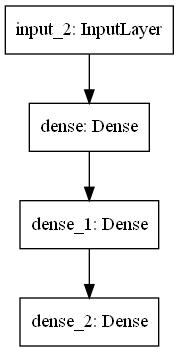

In [24]:
keras.utils.plot_model(model,'functional_model.png')

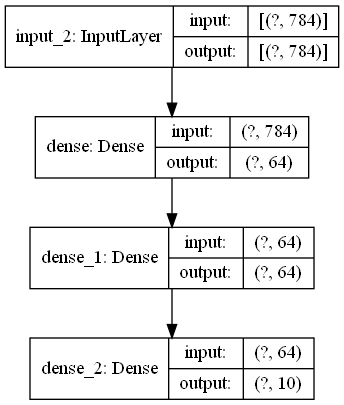

In [27]:
keras.utils.plot_model(model,'functional_model_with_shape_info.png',show_shapes=True)

A <b>graph of layers</b> is an intuitive mental image for a deep learning model, and the functional API is a way to create models that closely mirrors this.